# Simple Imputer

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [215]:
df = pd.read_csv(r"D:\Data Analytics\Python Scripts\Statistics\Missing_values\titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [236]:
df.mode()

,Age,Fare,Family,Survived
0,24.0,8.05,0,0


In [237]:
df[df['Age']==24.0]['Fare']

89       8.0500
118    247.5208
127      7.1417
139     79.2000
142     15.8500
199     13.0000
210      7.0500
234     10.5000
247     14.5000
293      8.8500
294      7.8958
310     83.1583
316         NaN
341    263.0000
345     13.0000
369     69.3000
394     16.7000
437     18.7500
499      7.7958
514      7.4958
565     24.1500
600     27.0000
615     65.0000
641     69.3000
655     73.5000
710     49.5042
743     16.1000
770      9.5000
858     19.2583
864     13.0000
Name: Fare, dtype: float64

In [216]:
df['Family'].value_counts()

Family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [217]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [218]:
mean_age = df['Age'].mean()
mean_Fare = df['Fare'].mean()

median_age = df['Age'].median()
median_Fare = df['Fare'].median()

mean_age, mean_Fare, median_age, median_Fare

(29.69911764705882, 32.279338297872336, 28.0, 14.4542)

In [219]:
x = df.drop(columns='Survived')
y = df['Survived']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

In [221]:
X_train['mean_age'] = X_train['Age'].fillna(mean_age)
X_train['median_age'] = X_train['Age'].fillna(median_age)
X_train['mean_Fare'] = X_train['Fare'].fillna(mean_Fare)
X_train['median_Fare'] = X_train['Fare'].fillna(median_Fare)

In [222]:
covariance  = X_train.cov()
corelation = X_train.corr()

Text(0.5, 1.0, 'covariance')

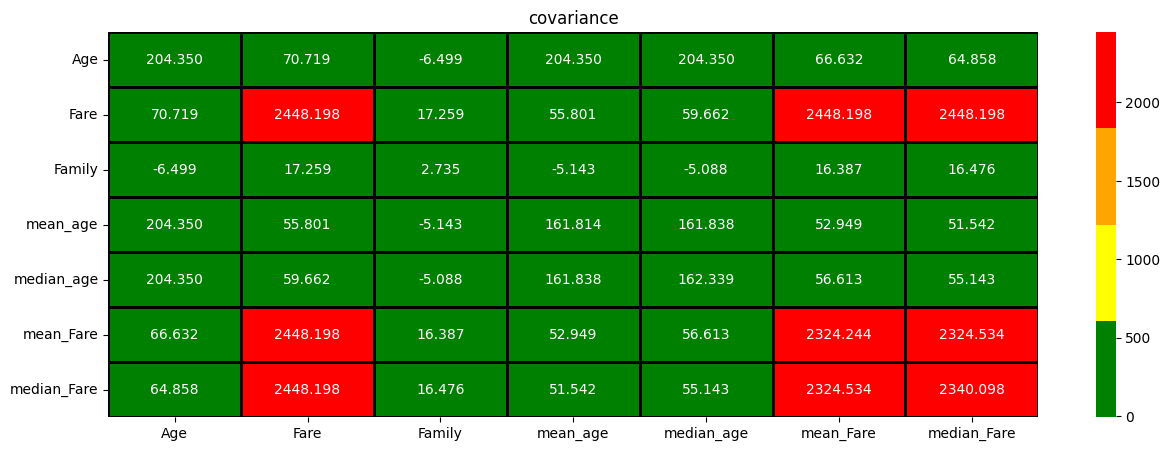

In [223]:
plt.figure(figsize=(15, 5))
sns.heatmap(
    covariance,
    annot=True,
    fmt=".3f",
    cmap=["green", "yellow", "orange", "red"],
    cbar=True,
    robust=True,
    linecolor="black",
    linewidths=2,
)
plt.title("covariance")

Text(0.5, 1.0, 'Corelation')

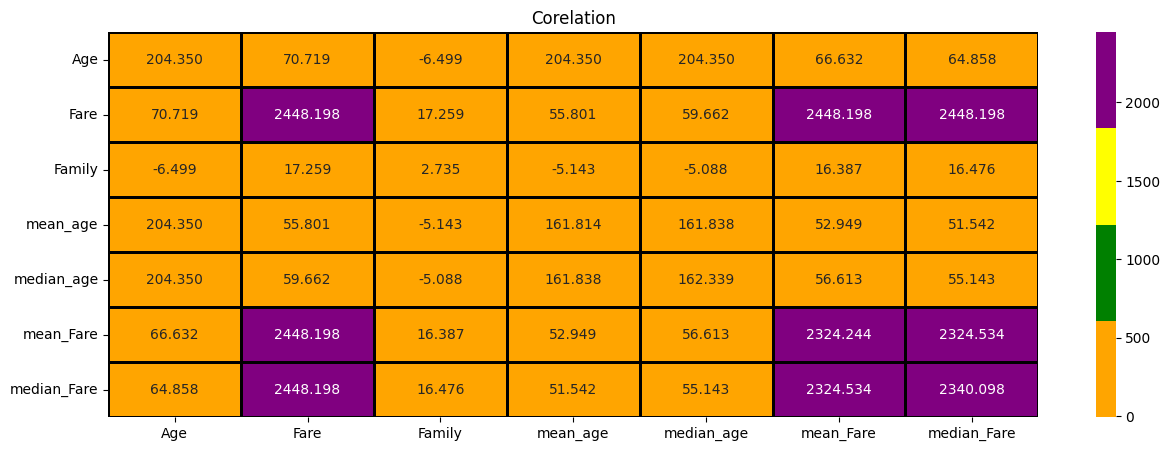

In [224]:
plt.figure(figsize=(15, 5))
sns.heatmap(
    covariance,
    annot=True,
    fmt=".3f",
    cmap=["orange","green", "yellow", "purple"],
    cbar=True,
    robust=True,
    linecolor="black",
    linewidths=2,
)
plt.title("Corelation")

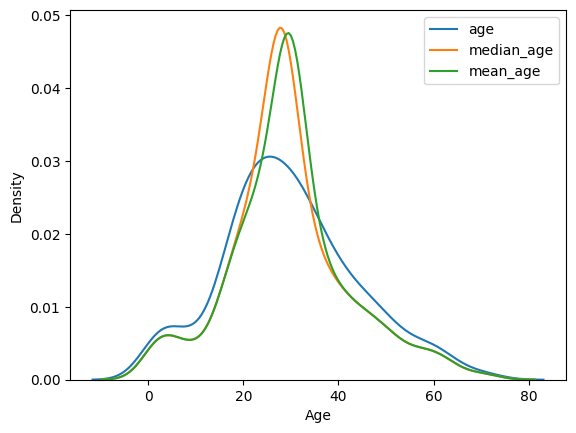

In [225]:
sns.kdeplot(X_train['Age'], legend=True, label = 'age')
sns.kdeplot(X_train['median_age'], legend=True, label = 'median_age')
sns.kdeplot(X_train['mean_age'], legend=True, label = 'mean_age')

plt.legend()

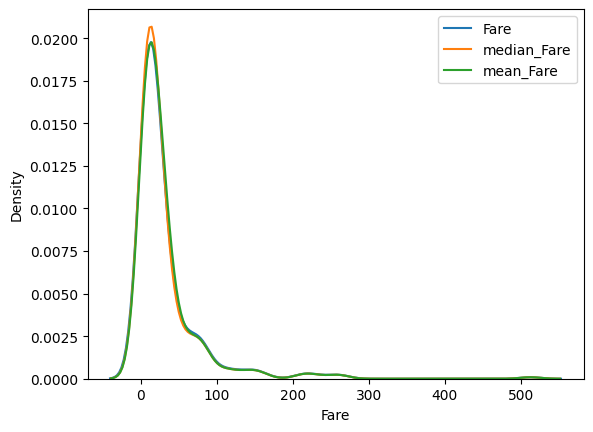

In [226]:
sns.kdeplot(X_train['Fare'], legend=True, label = 'Fare')
sns.kdeplot(X_train['median_Fare'], legend=True, label = 'median_Fare')
sns.kdeplot(X_train['mean_Fare'], legend=True, label = 'mean_Fare')

plt.legend()

<Axes: >

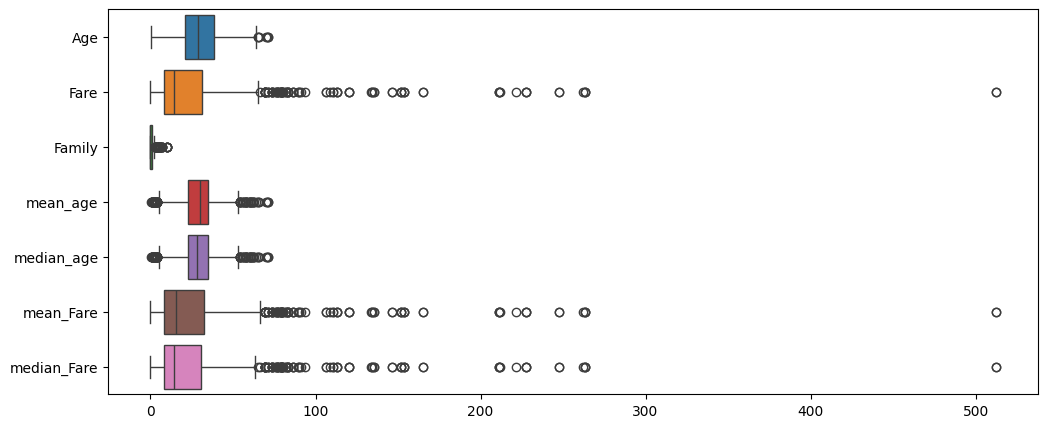

In [227]:
plt.figure(figsize=(12,5))
sns.boxplot(X_train, orient='h')

## Using Simple Imputer class of Sklearn

In [228]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=2, test_size=0.2)

In [229]:
smp = SimpleImputer(strategy='mean')
smp1 = SimpleImputer(strategy='median')

In [230]:
trf = ColumnTransformer([
    ('Imputation1',smp,['Age']),
    ('Imputation2',smp1, ['Fare'])
], remainder  = 'passthrough')

In [231]:
trf.fit(xtrain)
new_xtrain = trf.transform(xtrain)
new_xtest = trf.transform(xtest)

xtrain = pd.DataFrame(new_xtrain,columns=('Age','Fare', 'Family'))
xtest = pd.DataFrame(new_xtest,columns=('Age','Fare', 'Family'))

In [232]:
xtrain.isnull().sum()

Age       0
Fare      0
Family    0
dtype: int64

In [233]:
xtrain.isna().sum()


Age       0
Fare      0
Family    0
dtype: int64